In [35]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
import glob
import os
import random

In [36]:
def yolo2bbox(bboxes):
    xmin, ymin = bboxes[0]-bboxes[2]/2, bboxes[1]-bboxes[3]/2
    xmax, ymax = bboxes[0]+bboxes[2]/2, bboxes[1]+bboxes[3]/2
    return xmin, ymin, xmax, ymax

def plot_box(image, bboxes, labels):
    h, w, _ = image.shape
    for box_num, box in enumerate(bboxes):
        x1, y1, x2, y2 = yolo2bbox(box)
        xmin = int(x1*w)
        ymin = int(y1*h)
        xmax = int(x2*w)
        ymax = int(y2*h)

        thickness = max(2, int(w/275))

        cv2.rectangle(
            image, 
            (xmin, ymin), (xmax, ymax),
            color=(0, 0, 255),
            thickness=thickness
        )
    return image

In [37]:
def plot(image_paths, label_paths, num_samples):
    all_images = []
    all_images.extend(glob.glob(image_paths+'/*.jpg'))
    all_images.extend(glob.glob(image_paths+'/*.JPG'))
    all_images.sort()

    num_images = len(all_images)
    plt.figure(figsize=(6, 6))
    for i in range(num_samples):
        j = random.randint(0,num_images-1)
        image_name = all_images[j]
        image_name = '.'.join(image_name.split(os.path.sep)[-1].split('.')[:-1])
        image = cv2.imread(all_images[j])
        with open(os.path.join(label_paths, image_name+'.txt'), 'r') as f:
            bboxes = []
            labels = []
            label_lines = f.readlines()
            for label_line in label_lines:
                label = label_line[0]
                bbox_string = label_line[2:]
                x_c, y_c, w, h = bbox_string.split(' ')
                x_c = float(x_c)
                y_c = float(y_c)
                w = float(w)
                h = float(h)
                bboxes.append([x_c, y_c, w, h])
                labels.append(label)
        result_image = plot_box(image, bboxes, labels)
        plt.subplot(1, 1, i+1)
        plt.imshow(result_image[:, :, ::-1])
        plt.axis('off')
    plt.subplots_adjust(wspace=1)
    plt.tight_layout()
    plt.show()

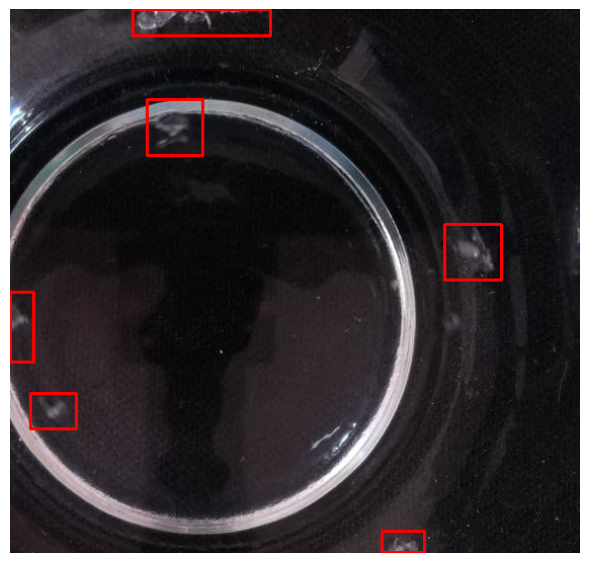

In [38]:
plot(
    image_paths='./datasets/train/images/', 
    label_paths='./datasets/train/labels/',
    num_samples=1,
)

In [39]:
model = YOLO('yolov8n.pt')

results = model.train(
   # task='detect'
   data='./datasets/data.yaml',
   imgsz=1280,
   epochs=2,
   batch=10,
   name='yolov8n_microplastic')

Ultralytics YOLOv8.0.229 🚀 Python-3.11.4 torch-2.0.1+cu118 CUDA:0 (NVIDIA GeForce RTX 4060 Laptop GPU, 8188MiB)
engine\trainer: task=detect, mode=train, model=yolov8n.pt, data=./datasets/data.yaml, epochs=2, time=None, patience=50, batch=10, imgsz=1280, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=yolov8n_microplastic4, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_c

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: bolber (safednn). Use `wandb login --relogin` to force relogin


Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks with YOLOv8n...
AMP: checks passed ✅


train: Scanning C:\Users\ASamek.ERP\Desktop\Pliki\Studia\UMFO\datasets\train\labels.cache... 577 images, 0 backgrounds, 0 corrupt: 100%|██████████| 577/577 [00:00<?, ?it/s]
val: Scanning C:\Users\ASamek.ERP\Desktop\Pliki\Studia\UMFO\datasets\valid\labels.cache... 204 images, 0 backgrounds, 0 corrupt: 100%|██████████| 204/204 [00:00<?, ?it/s]


Plotting labels to runs\detect\yolov8n_microplastic4\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.00046875), 63 bias(decay=0.0)
2 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/2       6.1G      2.127      2.567      1.581        127       1280: 100%|██████████| 58/58 [00:19<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  2.05it/s]

                   all        204       1701      0.731      0.431      0.536       0.23



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/2       6.1G      1.974      1.927      1.419         55       1280: 100%|██████████| 58/58 [00:14<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.33it/s]

                   all        204       1701      0.682       0.56      0.603      0.279



2 epochs completed in 0.015 hours.
Optimizer stripped from runs\detect\yolov8n_microplastic4\weights\last.pt, 6.4MB
Optimizer stripped from runs\detect\yolov8n_microplastic4\weights\best.pt, 6.4MB

Validating runs\detect\yolov8n_microplastic4\weights\best.pt...
Ultralytics YOLOv8.0.229 🚀 Python-3.11.4 torch-2.0.1+cu118 CUDA:0 (NVIDIA GeForce RTX 4060 Laptop GPU, 8188MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:07<00:00,  1.57it/s]


                   all        204       1701      0.675      0.566      0.601      0.279
Speed: 2.1ms preprocess, 6.4ms inference, 0.0ms loss, 8.4ms postprocess per image
Results saved to runs\detect\yolov8n_microplastic4


lr/pg0,▁█
lr/pg1,▁█
lr/pg2,▁█
metrics/mAP50(B),▁█
metrics/mAP50-95(B),▁█
metrics/precision(B),█▁
metrics/recall(B),▁█
model/GFLOPs,▁
model/parameters,▁
model/speed_PyTorch(ms),▁
train/box_loss,█▁
